## Titanic Dataset Analysis

This project helped me practice my Python skills with libraries such as pandas and matplotlib for data analysis with a classic dataset. It also honed my EDA skills and data cleaning.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# load dataset automatically using seaborn
df = sns.load_dataset('titanic')

In [29]:
# peek at first few rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [30]:
# get shape of dataset (rows, columns)
df.shape

(891, 15)

In [31]:
# get column data types + non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [32]:
# get summary statistics for all columns
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# missing values sorted by most missing
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [34]:
# deck column is mostly missing and pclass is the same as class so we drop it both
df = df.drop(columns=['deck','class'])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,man,True,Cherbourg,yes,True


In [35]:
# handle missing values so let's fill in age with median
df['age'] = df['age'].fillna(df['age'].median())
np.unique(df['age'])

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ])

In [36]:
# let's fill in embarked and embarked_town with mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0]) # mode returns a series so we index it
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [37]:
# check number of duplicated rows
df.duplicated().sum()
df = df.drop_duplicates()
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,woman,False,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,man,True,Cherbourg,yes,True


In [38]:
# reset index
df = df.reset_index(drop=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,0,3,female,39.0,0,5,29.1250,Q,woman,False,Queenstown,no,False
771,1,1,female,19.0,0,0,30.0000,S,woman,False,Southampton,yes,True
772,0,3,female,28.0,1,2,23.4500,S,woman,False,Southampton,no,False
773,1,1,male,26.0,0,0,30.0000,C,man,True,Cherbourg,yes,True


In [39]:
# convert frequent categories (save memory, helps modelling)
df = df.astype({
    "sex": "category",
    "embarked": "category",
    "alive": "category",
    "alone": "category",
    "survived": "category",
    "who": "category"
})

In [40]:
# normalize categorical strings (remove whitespace, lower-case)
str_cols = df.select_dtypes(include="object").columns
for c in str_cols:
    df[c] = df[c].astype(str).str.strip().str.lower()
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,0,3,female,39.0,0,5,29.1250,Q,woman,False,queenstown,no,False
771,1,1,female,19.0,0,0,30.0000,S,woman,False,southampton,yes,True
772,0,3,female,28.0,1,2,23.4500,S,woman,False,southampton,no,False
773,1,1,male,26.0,0,0,30.0000,C,man,True,cherbourg,yes,True


In [41]:
# rerun a final quick check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     775 non-null    category
 1   pclass       775 non-null    int64   
 2   sex          775 non-null    category
 3   age          775 non-null    float64 
 4   sibsp        775 non-null    int64   
 5   parch        775 non-null    int64   
 6   fare         775 non-null    float64 
 7   embarked     775 non-null    category
 8   who          775 non-null    category
 9   adult_male   775 non-null    bool    
 10  embark_town  775 non-null    object  
 11  alive        775 non-null    category
 12  alone        775 non-null    category
dtypes: bool(1), category(6), float64(2), int64(3), object(1)
memory usage: 42.5+ KB


In [42]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,southampton,no,True


In [43]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [44]:
# do exploratory data analysis (EDA)
# distribution of age
df['age'].describe()

count    775.000000
mean      29.581187
std       13.766359
min        0.420000
25%       21.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: age, dtype: float64

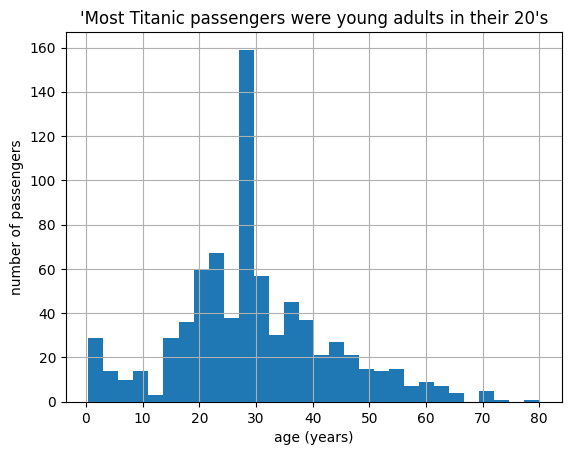

In [45]:
df['age'].hist(bins=30)

plt.title("'Most Titanic passengers were young adults in their 20's")
plt.xlabel('age (years)')
plt.ylabel('number of passengers');


In [46]:
# count of passengers by sex
df['sex'].value_counts()

sex
male      483
female    292
Name: count, dtype: int64

In [48]:
# count of passengers by class
df['pclass'].value_counts()

pclass
3    401
1    210
2    164
Name: count, dtype: int64

In [49]:
# fare distribution
df['fare'].describe()

count    775.000000
mean      34.878403
std       52.408474
min        0.000000
25%        8.050000
50%       15.900000
75%       34.197900
max      512.329200
Name: fare, dtype: float64

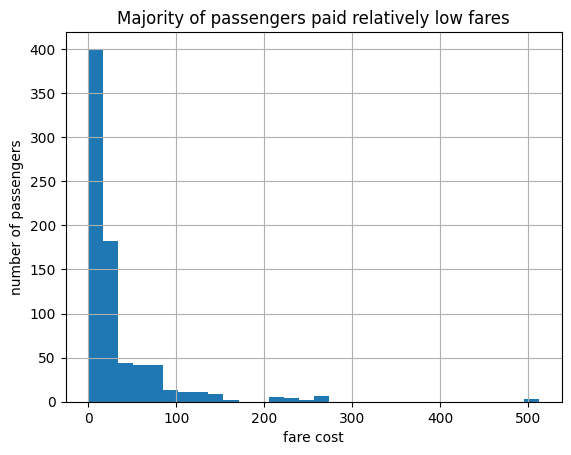

In [57]:
df['fare'].hist(bins=30)

plt.title('Majority of passengers paid relatively low fares')
plt.xlabel('fare cost')
plt.ylabel('number of passengers');

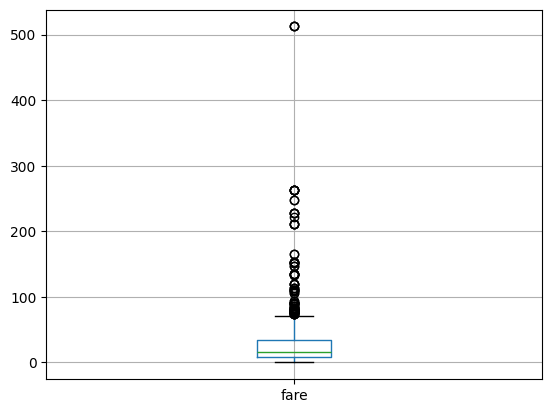

In [60]:
df.boxplot('fare');